# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(airbnbDataSet_filename, header=0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
columns_to_drop = ['name', 'description', 'neighborhood_overview','host_name','host_location','host_about','amenities']
df.drop(columns=columns_to_drop, inplace=True, axis=1)

In [5]:
df['label'] = stats.mstats.winsorize(df['price'], limits=[0.01, 0.01])

In [6]:
df.drop(columns='host_total_listings_count', inplace=True, axis=1)

In [7]:
to_drop = ['host_response_rate','host_acceptance_rate']
df.drop(columns=to_drop,inplace=True,axis=1)

In [8]:
df['bedrooms_na'] = df['bedrooms'].isnull()
df['beds_na'] = df['beds'].isnull()

In [9]:
mean_bedrooms=df['bedrooms'].mean()
df['bedrooms'].fillna(value=mean_bedrooms, inplace=True)
mean_beds=df['beds'].mean()
df['beds'].fillna(value=mean_beds, inplace=True)

Above are all steps completed in unit 8 assignment.
Below I will perform one-hot encoding.

In [10]:
encoder = OneHotEncoder(handle_unknown="error", sparse=False)
to_encode = ['room_type','neighbourhood_group_cleansed']
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]))
df_enc.columns = encoder.get_feature_names(to_encode)
df_enc.head()

,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
df = df.join(df_enc)
df.drop(columns = to_encode ,axis=1, inplace=True)

In [12]:
correlation_matrix = df.corr()
correlation_with_label = correlation_matrix['label'].abs()
sorted_features = correlation_with_label.sort_values(ascending=False)
print(sorted_features)

label                                           1.000000
price                                           0.998439
accommodates                                    0.524429
bedrooms                                        0.462181
beds                                            0.405765
room_type_Private room                          0.364792
room_type_Entire home/apt                       0.356821
bathrooms                                       0.328572
neighbourhood_group_cleansed_Manhattan          0.241940
availability_60                                 0.152464
availability_90                                 0.148327
availability_30                                 0.145384
neighbourhood_group_cleansed_Queens             0.135177
room_type_Hotel room                            0.127968
availability_365                                0.124195
neighbourhood_group_cleansed_Brooklyn           0.113415
maximum_maximum_nights                          0.111478
review_scores_location         

Based on this information and some heuristics (I believe location to be relevant), I will be selecting the features to to train this model on which will be. The other features have too low of a correlation to be relevant with predicting the price, in my opinion. This is also to cut down time costs in training and testing the models.

In [13]:
features = ['accommodates','bedrooms','beds','room_type_Private room','room_type_Entire home/apt','bathrooms','neighbourhood_group_cleansed_Manhattan','availability_60','availability_90','availability_30','neighbourhood_group_cleansed_Queens',
        'room_type_Hotel room','availability_365','neighbourhood_group_cleansed_Brooklyn','neighbourhood_group_cleansed_Bronx','room_type_Shared room','neighbourhood_group_cleansed_Staten Island']

In [14]:
df.shape

(28022, 50)

Ultimately, after testing different features combinations, using all the features appeared to yield the best results. At the very least, I will be dropping some truly irrelevant columns.

In [15]:
df.drop(columns=['host_is_superhost','host_has_profile_pic','host_identity_verified'], inplace=True, axis=1)

In [16]:
price_range = df['price'].max() - df['price'].min()
price_avg = df['price'].mean()
price_vars = df['price'].var()
print("Price Range:", price_range)
print("Price Average:", price_avg)
print("Price Variance:", price_vars)

Price Range: 971.0
Price Average: 154.228748840197
Price Variance: 19829.31628849557


In [17]:
label_range = df['label'].max() - df['label'].min()
label_avg = df['label'].mean()
label_vars = df['label'].var()
print("Label Range:", label_range)
print("Label Average:", label_avg)
print("Label Variance:", label_vars)

Label Range: 869.0
Label Average: 153.36078795232316
Label Variance: 18436.19822396781


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [18]:
y = df['label']
X = df.drop(columns=['label','price'],axis=1)
#X = df[features]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1234)

First I will fit a basic linear regression model (with default hyperparameters) and check it's accuracy. I will compare the ensemble models' performance to this model. I expect my ensemble models to perform better than this simple/basic model.

In [20]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_lr_pred = lr_model.predict(X_test)

In [22]:
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared = False)
lr_r2 = r2_score(y_test, y_lr_pred)
print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 100.08275867384582
[LR] R2: 0.4825293369556659


The linear model performed extremely poorly because I theorize the relationships are not linear. 

Now we will work on a GBDT. 

In [23]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

In [24]:
print("Beginning grid search...")
gbdt_model = GradientBoostingRegressor(random_state=123)
grid_search = GridSearchCV(estimator=gbdt_model, param_grid=param_grid, cv=3, n_jobs = -1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Completed.")

Beginning grid search...
Completed.


In [25]:
best_gbdt_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    random_state=123
)

In [26]:
best_gbdt_model.fit(X_train, y_train)
y_gbdt_pred = best_gbdt_model.predict(X_test)
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared = False)
gbdt_r2 = r2_score(y_test, y_gbdt_pred)
print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))

[GBDT] Root Mean Squared Error: 83.63150059104449
[GBDT] R2: 0.6386675409495216


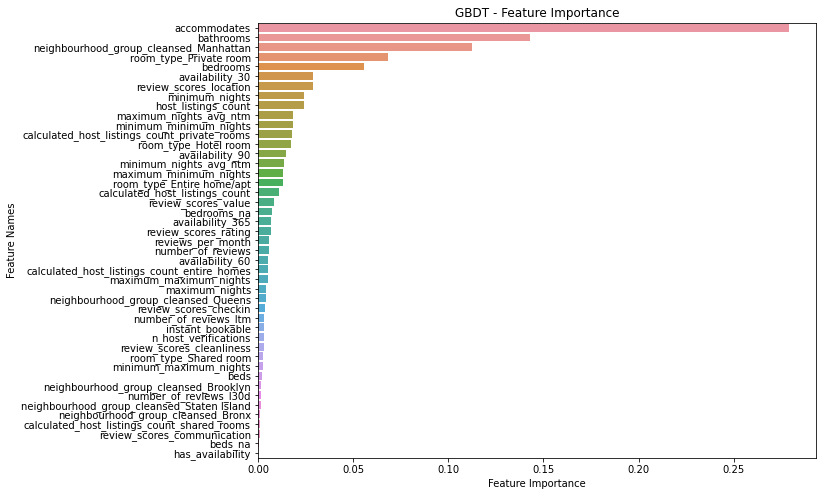

In [28]:
feature_importance = np.array(best_gbdt_model.feature_importances_)
feature_names = np.array(X_train.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
plt.title('GBDT - Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.show()

Residual mean: 0.38881075330103626
Residual stdev: 83.63059677718432


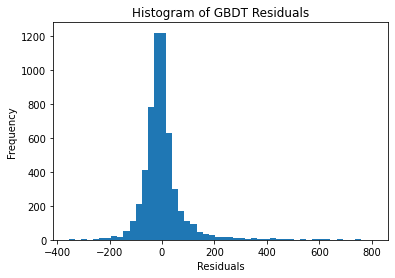

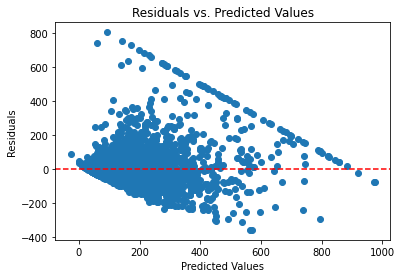

In [29]:
residuals = y_test - y_gbdt_pred
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)
print("Residual mean:",mean_residuals)
print("Residual stdev:",std_residuals)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of GBDT Residuals')
plt.show()
plt.scatter(y_gbdt_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.show()

Now we will work on a Random Forest. 

In [30]:
param_grid = {
    'max_depth': [None, 5, 10],
    'n_estimators': [50, 100, 150]
}

In [32]:
print("Beginning grid search...")
rf_model = RandomForestRegressor(random_state=123)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, n_jobs = -1, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Completed.")

Beginning grid search...
Completed.


In [33]:
best_rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    random_state=123
)

In [34]:
best_rf_model.fit(X_train, y_train)
y_rf_pred = best_rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared = False)
rf_r2 = r2_score(y_test, y_rf_pred)
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))

[RF] Root Mean Squared Error: 84.57840019349071
[RF] R2: 0.630439002802839


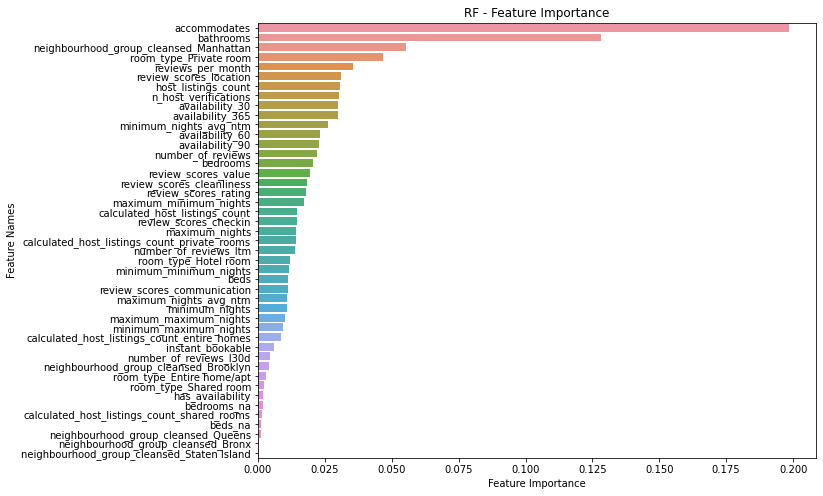

In [35]:
feature_importance = np.array(best_rf_model.feature_importances_)
feature_names = np.array(X_train.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
plt.title('RF - Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.show()

Residual mean: -3.2446387225422018
Residual stdev: 84.51614105512893


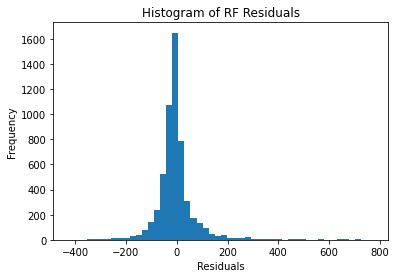

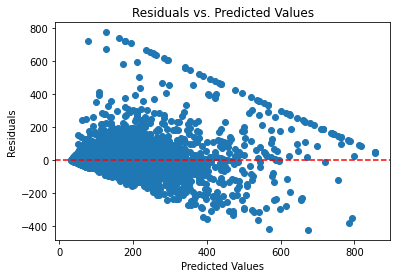

In [36]:
residuals = y_test - y_rf_pred
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)
print("Residual mean:",mean_residuals)
print("Residual stdev:",std_residuals)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of RF Residuals')
plt.show()
plt.scatter(y_rf_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.show()

Now I will create some plots to compare. 

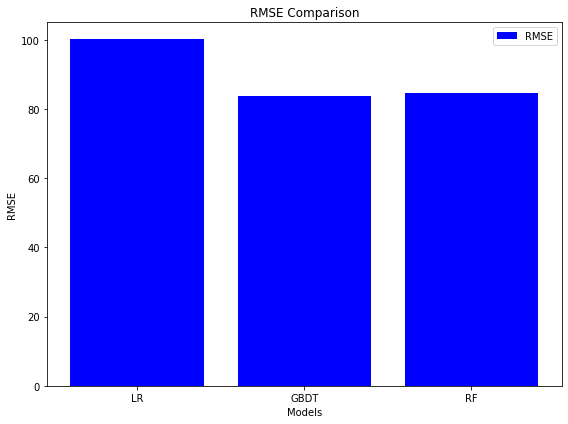

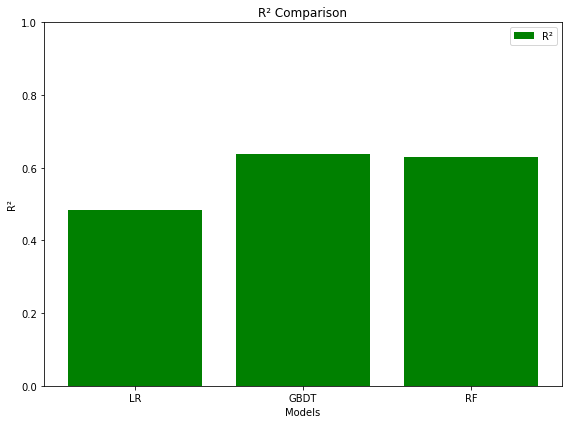

In [38]:
plt.figure(figsize=(8, 6))
plt.bar(labels, RMSE_Results, color='blue', label='RMSE')
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.ylim([0, 105])
plt.title('RMSE Comparison')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(labels, R2_Results, color='green', label='R²')
plt.xlabel("Models")
plt.ylabel("R²")
plt.ylim([0, 1])
plt.title('R² Comparison')
plt.legend()
plt.tight_layout()
plt.show()

## Analysis of results

Based on the range, average, and variance of the label it is clear there are some large outliers and I suspect they are the reason for some other issues with the predictions of the models that appear later. Despite winsorizing the price, there are enough outliers and variance that the issue persisted. Wanting to limit how much I was altering the existing spread of the data, I did not make further changes. 

The RMSE of the basic linear regression model was 100.08 and the GBDT and Random Forest models improved on this with a RMSE respectively of 83.63 and 84.58

The R^2 as well improved from the linear regression model to the GBDT and Random Forest models. The GBDT had the best performance overall, although quite similar to the Random Forest. The GBDT had R^2 0.64 while Random Forest had one of 0.63

Since the label had a range of 869, it can be said that the GBDT and Random Forest models have an approximate error of 10%, as in the predicted prices by the model are on average 10% higher or lower than the actual price. 

Considering the time constraints of creating this model (I could explore only limited hyperparameters through GridSearch due to the model timing out and my laptop not being able to run the search), I think this is acceptable performance. The feature importance plots also show a reasonable distribution for both GBDT and Random Forest that is similar to the correlations calculated earlier. 

After analysis of the residuals, I have determined Gradient Boosting Decision Trees to be the best model for this problem as the histogram of the residuals are relatively normally distributed. 

Looking further into the model's predictions, based on the scatterplot of the residuals vs. predicted values it appears that the model tends to predict the price to be higher than it actually is, possibly due to the outliers. It is also more accurate in predicting lower priced airbnb prices than higher ones. Finally, there appears to be a section of data points that are extremely linear in the higher price ranges. I believe this to be due to the high variance that exists in the prices. In a future revision, I would learn and apply some technique to balance the data and have less variance and outliers in the prices without losing the relationships held in the data. This would ensure no patterns in the residual scatterplot and the model would generalize better than it is now. 